11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 571,018 (2.18 MB)

 Trainable params: 569,226 (2.17 MB)

 Non-trainable params: 1,792 (7.00 KB)

Epoch 1/5
422/422 - 20s - 47ms/step - accuracy: 0.8961 - loss: 0.3433 - val_accuracy: 0.9707 - val_loss: 0.1021 - learning_rate: 1.0000e-03
Epoch 2/5
422/422 - 8s - 18ms/step - accuracy: 0.9516 - loss: 0.1593 - val_accuracy: 0.9748 - val_loss: 0.0861 - learning_rate: 1.0000e-03
Epoch 3/5
422/422 - 8s - 20ms/step - accuracy: 0.9624 - loss: 0.1216 - val_accuracy: 0.9777 - val_loss: 0.0715 - learning_rate: 1.0000e-03
Epoch 4/5
422/422 - 7s - 17ms/step - accuracy: 0.9681 - loss: 0.1014 - val_accuracy: 0.9792 - val_loss: 0.0653 - learning_rate: 1.0000e-03
Epoch 5/5
422/422 - 8s - 19ms/step - accuracy: 0.9717 - loss: 0.0897 - val_accuracy: 0.9805 - val_loss: 0.0655 - learning_rate: 1.0000e-03

Test accuracy: 0.9760, Test loss: 0.0791

Classification report:
               precision    recall  f1-score   support

           0     0.9720    0.9929    0.9823       980
           1     0.9894    0.9912    0.9903      1135
           2     0.9794    0.9651    0.9722      1032
           3     0.9

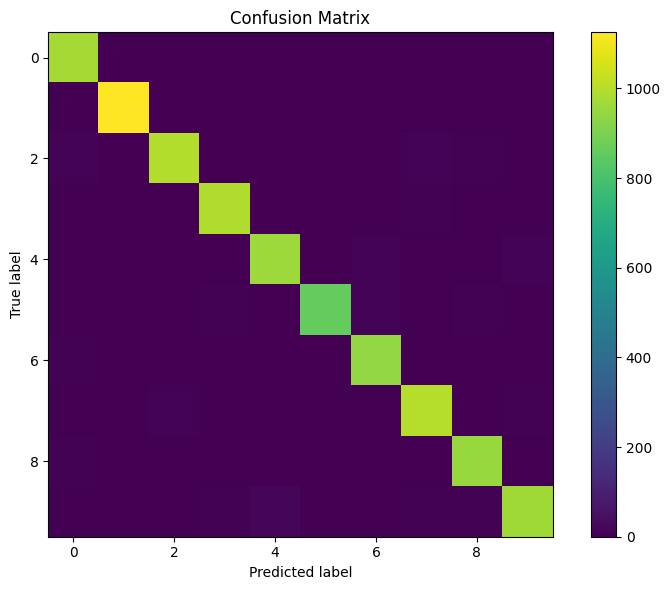

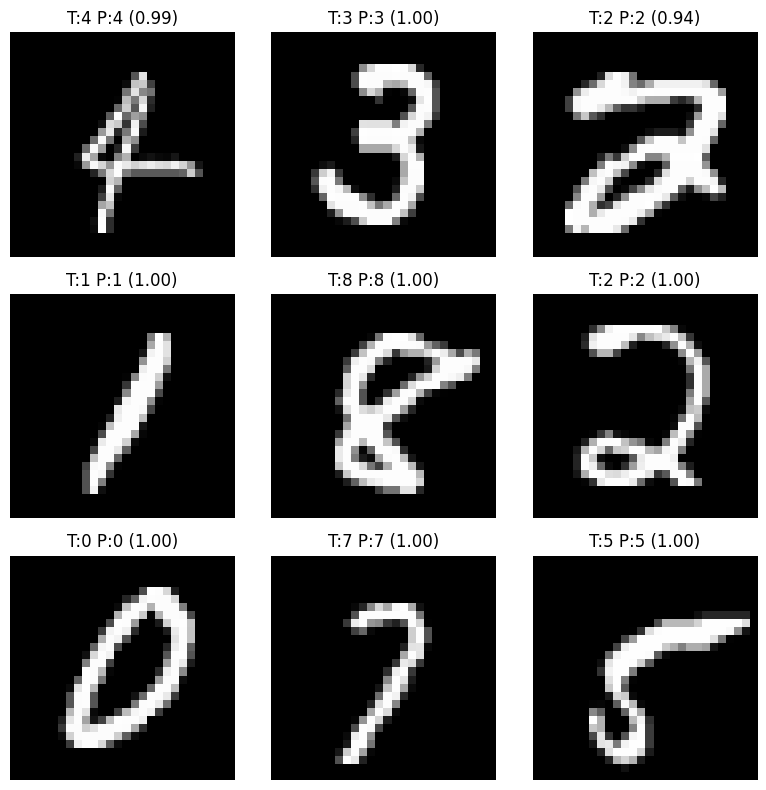

Saved model to mnist_mlp_for_cheque_digits.h5


In [ ]:
#case study 1

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models, utils, callbacks
from sklearn.metrics import confusion_matrix, classification_report

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32") / 255.0

x_train_flat = x_train.reshape((-1, 28 * 28))
x_test_flat  = x_test.reshape((-1, 28 * 28))

y_train_cat = utils.to_categorical(y_train, 10)
y_test_cat  = utils.to_categorical(y_test, 10)

def build_mlp(input_shape=(28*28,), num_classes=10, dropout_rate=0.3):
    model = models.Sequential([
        layers.Input(shape=input_shape),
        layers.Dense(512, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(dropout_rate),

        layers.Dense(256, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(dropout_rate),

        layers.Dense(128, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(dropout_rate),

        layers.Dense(num_classes, activation='softmax')
    ])
    return model

model = build_mlp()
model.summary()

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

cb_early = callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
cb_reduce = callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

history = model.fit(
    x_train_flat, y_train_cat,
    validation_split=0.1,
    epochs=5,
    batch_size=128,
    callbacks=[cb_early, cb_reduce],
    verbose=2
)

test_loss, test_acc = model.evaluate(x_test_flat, y_test_cat, verbose=0)
print(f"\nTest accuracy: {test_acc:.4f}, Test loss: {test_loss:.4f}\n")

y_pred_probs = model.predict(x_test_flat, verbose=0)
y_pred = np.argmax(y_pred_probs, axis=1)

cm = confusion_matrix(y_test, y_pred)
print("Classification report:\n", classification_report(y_test, y_pred, digits=4))

plt.figure(figsize=(8,6))
plt.imshow(cm, interpolation='nearest')
plt.title("Confusion Matrix")
plt.colorbar()
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.tight_layout()
plt.show()

num_samples = 9
indices = np.random.choice(len(x_test), num_samples, replace=False)
plt.figure(figsize=(8,8))
for i, idx in enumerate(indices):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[idx], cmap='gray')
    plt.axis('off')
    true = y_test[idx]
    pred = y_pred[idx]
    prob = np.max(y_pred_probs[idx])
    plt.title(f"T:{true} P:{pred} ({prob:.2f})")
plt.tight_layout()
plt.show()

# 11. Save model for deployment
model.save("mnist_mlp_for_cheque_digits.h5")
print("Saved model to mnist_mlp_for_cheque_digits.h5")


Epoch 1/5
29/29 - 2s - 54ms/step - loss: 1.0136 - val_loss: 0.9417
Epoch 2/5
29/29 - 0s - 4ms/step - loss: 0.9754 - val_loss: 0.9202
Epoch 3/5
29/29 - 0s - 4ms/step - loss: 0.9541 - val_loss: 0.9037
Epoch 4/5
29/29 - 0s - 5ms/step - loss: 0.9339 - val_loss: 0.8877
Epoch 5/5
29/29 - 0s - 4ms/step - loss: 0.9124 - val_loss: 0.8702
Threshold: 1.499102645965161

Confusion Matrix:
 [[954  46]
 [  0  50]]

Classification Report:
               precision    recall  f1-score   support

         0.0     1.0000    0.9540    0.9765      1000
         1.0     0.5208    1.0000    0.6849        50

    accuracy                         0.9562      1050
   macro avg     0.7604    0.9770    0.8307      1050
weighted avg     0.9772    0.9562    0.9626      1050



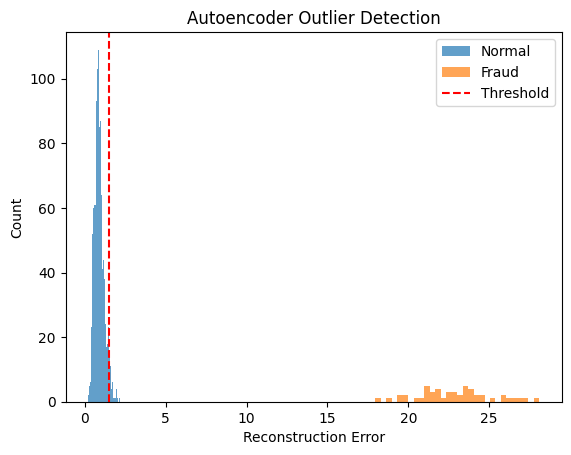

In [ ]:
#case study 2

import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

normal_data = np.random.normal(loc=0.0, scale=1.0, size=(1000, 20))
fraud_data = np.random.normal(loc=5.0, scale=1.0, size=(50, 20))

X = np.vstack([normal_data, fraud_data])
y = np.hstack([np.zeros(1000), np.ones(50)])


X_train = normal_data
X_test = X
y_test = y

input_dim = X_train.shape[1]

autoencoder = models.Sequential([
    layers.Input(shape=(input_dim,)),
    layers.Dense(16, activation="relu"),
    layers.Dense(8, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(input_dim, activation="linear")
])

autoencoder.compile(optimizer="adam", loss="mse")

history = autoencoder.fit(
    X_train, X_train,
    epochs=5,
    batch_size=32,
    validation_split=0.1,
    verbose=2
)

reconstructions = autoencoder.predict(X_test, verbose=0)
mse = np.mean(np.square(X_test - reconstructions), axis=1)

train_recon = autoencoder.predict(X_train, verbose=0)
train_mse = np.mean(np.square(X_train - train_recon), axis=1)
threshold = np.mean(train_mse) + 2*np.std(train_mse)

y_pred = (mse > threshold).astype(int)

from sklearn.metrics import classification_report, confusion_matrix

print("Threshold:", threshold)
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, digits=4))

plt.hist(mse[y_test==0], bins=30, alpha=0.7, label="Normal")
plt.hist(mse[y_test==1], bins=30, alpha=0.7, label="Fraud")
plt.axvline(threshold, color="red", linestyle="--", label="Threshold")
plt.legend()
plt.xlabel("Reconstruction Error")
plt.ylabel("Count")
plt.title("Autoencoder Outlier Detection")
plt.show()


In [ ]:
# case study 3

import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

data = {
    'email': [
        "Win a free lottery now",
        "Meeting tomorrow at 10am",
        "Limited offer, claim your prize",
        "Project deadline extended",
        "Congratulations! You won a gift",
        "Please review attached file",
        "Earn money quickly from home",
        "Team meeting agenda",
        "You have won a free ticket",
        "Submit your report by tonight"
    ],
    'label': [1,0,1,0,1,0,1,0,1,0]
}
df = pd.DataFrame(data)

X_train, X_test, y_train, y_test = train_test_split(
    df['email'], df['label'], test_size=0.3, random_state=42
)

vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['liblinear']
}

grid = GridSearchCV(LogisticRegression(), param_grid, cv=2, scoring='accuracy')
grid.fit(X_train_vec, y_train)

print("Best Parameters:", grid.best_params_)
print("Best CV Score:", grid.best_score_)

y_pred = grid.predict(X_test_vec)
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, digits=4))


Best Parameters: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
Best CV Score: 0.5833333333333333

Confusion Matrix:
 [[1 1]
 [0 1]]

Classification Report:
               precision    recall  f1-score   support

           0     1.0000    0.5000    0.6667         2
           1     0.5000    1.0000    0.6667         1

    accuracy                         0.6667         3
   macro avg     0.7500    0.7500    0.6667         3
weighted avg     0.8333    0.6667    0.6667         3



In [ ]:
#case study 4

import numpy as np

ratings = np.array([
    [5, 3, 0, 1],
    [4, 0, 0, 1],
    [1, 1, 0, 5],
    [0, 0, 5, 4],
    [0, 1, 5, 4]
], dtype=np.float32)

num_users, num_movies = ratings.shape
num_hidden = 2
learning_rate = 0.1
epochs = 5000

np.random.seed(42)
W = np.random.normal(0, 0.01, size=(num_movies, num_hidden))
hb = np.zeros(num_hidden)
vb = np.zeros(num_movies)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

for epoch in range(epochs):
    for u in range(num_users):
        v0 = ratings[u]
        mask = (v0 > 0)

        h_prob = sigmoid(np.dot(v0, W) + hb)
        h_state = (h_prob > np.random.rand(num_hidden)).astype(float)

        v_prob = sigmoid(np.dot(h_state, W.T) + vb)
        v_prob = v_prob * mask
        h_prob_neg = sigmoid(np.dot(v_prob, W) + hb)
        W += learning_rate * (np.outer(v0, h_prob) - np.outer(v_prob, h_prob_neg))
        vb += learning_rate * (v0 - v_prob)
        hb += learning_rate * (h_prob - h_prob_neg)

predicted_ratings = sigmoid(np.dot(sigmoid(np.dot(ratings, W) + hb), W.T) + vb)

print("Original Ratings (0=unrated):\n", ratings)
print("\nPredicted Ratings:\n", np.round(predicted_ratings,2))

print("\nTop Recommended Movie for Each User:")
for user_id in range(num_users):
    user_unrated = np.where(ratings[user_id] == 0)[0]
    if len(user_unrated) == 0:
        print(f"User {user_id}: All movies rated")
        continue
    predicted_for_unrated = predicted_ratings[user_id, user_unrated]
    recommended_idx = user_unrated[np.argmax(predicted_for_unrated)]
    recommended_score = predicted_for_unrated[np.argmax(predicted_for_unrated)]
    print(f"User {user_id}: Recommend Movie {recommended_idx} (Predicted Rating {recommended_score:.2f})")


Original Ratings (0=unrated):
 [[5. 3. 0. 1.]
 [4. 0. 0. 1.]
 [1. 1. 0. 5.]
 [0. 0. 5. 4.]
 [0. 1. 5. 4.]]

Predicted Ratings:
 [[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]

Top Recommended Movie for Each User:
User 0: Recommend Movie 2 (Predicted Rating 1.00)
User 1: Recommend Movie 1 (Predicted Rating 1.00)
User 2: Recommend Movie 2 (Predicted Rating 1.00)
User 3: Recommend Movie 0 (Predicted Rating 1.00)
User 4: Recommend Movie 0 (Predicted Rating 1.00)


In [ ]:
#case study 5

import numpy as np
from sklearn.neural_network import MLPClassifier


X = np.array([[0,0], [0,1], [1,0], [1,1]])
y = np.array([0, 1, 1, 0])

model = MLPClassifier(hidden_layer_sizes=(2,), activation='tanh', solver='adam', max_iter=10000, random_state=42)

model.fit(X, y)

y_pred = model.predict(X)

print("Input:\n", X)
print("Predicted Output:", y_pred)
print("Expected Output :", y)

print("Training Accuracy:", model.score(X, y))


Input:
 [[0 0]
 [0 1]
 [1 0]
 [1 1]]
Predicted Output: [1 0 1 0]
Expected Output : [0 1 1 0]
Training Accuracy: 0.5
